# Tutorial 1: Input data

There are three input components: 

1. the nodes, 
2. the edges, 
3. the template

Each component and their properties are  plotted independently of each other.

## Specifying Nodes

There are two ways you can specify the coordinates of the nodes. 

### A pandas dataframe (Argument: nodes) 

To plot the nodes, the pandas dataframe must contain three columns that refer to the 3D coordinates of each node. By default, these columns are called `x`, `y`, `z`, but they can be manually specified by calling the `colnames` keyword argument. 

Thus, the dataframe will begin something like this:

| x       | y     | z     |
| :-------------:  | :----------: | :-----------: |
|  40     | 50    | 20    |
| -10     | 40    | 30    |

If we create this dataframe with the two nodes above, we will just plot two circles onto the figure. 

(<Figure size 216x216 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

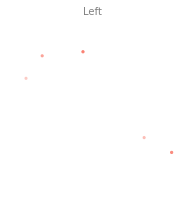

In [1]:
# Import packages
import netplotbrain
import pandas as pd
# Define the nodes
nodes_df = pd.DataFrame({'x': [40, 10, 30, -15, -25], 
                         'y': [50, 40, -10, -20, 20], 
                         'z': [20, 30, -10, -15, 30]})
# Call netplotbrain to plot
netplotbrain.plot(nodes=nodes_df, arrowaxis=None)

Here we just see five dots of the same size, but we have nodes in the 3D space. 

The second option `arrowaxis` turns off some default, directional arrows which do not look good in this small-scale example without a background template.

The other columns in the dataframe can refer to node-related properties (e.g., size and colour). In such cases the dataframe may begin something like this: 

These just become other columns in the dataframe (called node_df).

| x       | y     | z     | communities | degree_centrality |
| :-------------:  | :----------: | :-----------: | :----------: | :-----------: |
|  40     | 50    | 20    | 1    | 0.8
| -10     | 40    | 30    | 1    | 0.4

Then the columns `node_color=communities`and `node_size=degree_centrality` can be specified and each node will automatically be coloured or scaled by the specified column. For example: 

(<Figure size 216x288 with 3 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >, <Axes: >])

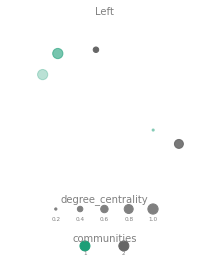

In [2]:
# Define the nodes (5 example nodes)
nodes_df = pd.DataFrame(data={'x': [40, 10, 30, -15, -25], 
                              'y': [50, 40, -10, -20, 20], 
                              'z': [20, 30, -10, -15, 30], 
                              'communities': [1, 1, 1, 2, 2], 
                              'degree_centrality': [1, 1, 0.2, 0.8, 0.4]})
# Call netplotbrain to plot
netplotbrain.plot(
    nodes=nodes_df,
    node_size='degree_centrality',
    node_color='communities',
    arrowaxis=None,
    node_scale=100)

This will just plot the nodes, with each node having the size of the degree_centrality column and a colour of the communities column. Here we have also added `node_scale` which just linearly scales all nodes by that factor. We also see that, when specifying `node_size` and `node_color`, that legends automatically appear.

At the moment we just have some circles floating in 3D space. Let us add some more information about this network.

### An atlas from templateflow or local file (Argument: nodes) 

One of the key benefits of using netplotbrain is that it interacts with TemplateFlow, which is a collection of brain templates and atlases.
The atlases can be used as nodes.
If you specify the key/value pairs of an atlas on templateflow in a dictionary, the atlas will be automatically downloaded.
For example, the following will get the 400 Parcels version from the Schaefer atlas.

(<Figure size 216x216 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

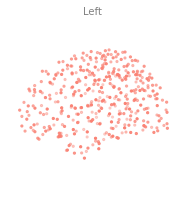

In [3]:
# Define the atlas by key value words of TemplateFlow name
nodes={'template': 'MNI152NLin2009cAsym',
         'atlas': 'Schaefer2018',
         'desc': '400Parcels7Networks',
         'resolution': 1}
## Template (nifti or string)
netplotbrain.plot(
    nodes=nodes,
    arrowaxis=None)     

See templateflow.org for more atlases.

If the template argument is specified in `netplotbrain.plot`, then the template argument does not need to be included in the `nodes` dictionary.

Since the nifti image consists of parcels (i.e., regions) of the brain instead of circles placed throughout the brain, it is possible to specify that you would rather visualize the parcels, over the circles, with a single argument `node_type`.

(<Figure size 216x216 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

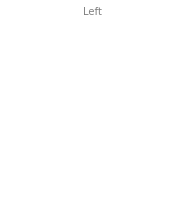

In [4]:
# Define the atlas by key value words of TemplateFlow name
nodes={'template': 'MNI152NLin2009cAsym',
         'atlas': 'Schaefer2018',
         'desc': '400Parcels7Networks',
         'resolution': 1}
# Plot
netplotbrain.plot(
    nodes=nodes,
    arrowaxis=None,
    node_type='parcels')     

## Specifying Edges

The edges between the nodes can be passed to netplotbrain as either a numpy array (NxN adjacency matrix) or a pandas dataframe (edgelist) with the default columns 'i', 'j', and 'weight' (optional). An example:

| j       | j     | weight     |
| :-------------:  | :----------: | :-----------: |
|  0     | 1    | 0.8    |
|  1     | 2    | 0.5    |

`i` and `j` reference the indices of our nodes defined above. You can use the argument `edgecol` to specify different column names.

Let us continue to add to our figure above: 

(<Figure size 216x252 with 2 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >])

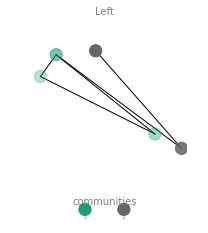

In [5]:
# Define the nodes (5 example nodes)
nodes_df = pd.DataFrame(data={'x': [40, 10, 30, -15, -25], 
                              'y': [50, 40, -10, -20, 20], 
                              'z': [20, 30, -10, -15, 30], 
                              'communities': [1, 1, 1, 2, 2], 
                              'degree_centrality': [1, 1, 0.2, 0.8, 0.4]})
# Define the edges 
edges_df = pd.DataFrame(data={'i': [0, 0, 1, 1, 3], 
                              'j': [1, 2, 2, 3, 4]})
# Call netplotbrain to plot
netplotbrain.plot(
    nodes=nodes_df,
    edges=edges_df,
    node_color='communities',
    arrowaxis=None,
    node_scale=150)

If you have the column `weight` in your edge dataframe, these will be automatically plotted as well. 
This can be turned off by setting `edge_weights` to False. Also, a list of length 3 can be given to edgecol that specifies alternative names for ['i', 'j', 'weights'].

(<Figure size 216x252 with 2 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >])

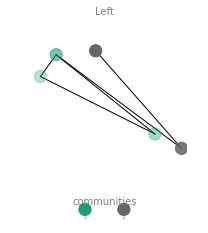

In [6]:
# Import packages
# Define the nodes (5 example nodes)
nodes_df = pd.DataFrame(data={'x': [40, 10, 30, -15, -25], 
                              'y': [50, 40, -10, -20, 20], 
                              'z': [20, 30, -10, -15, 30], 
                              'communities': [1, 1, 1, 2, 2], 
                              'degree_centrality': [1, 1, 0.2, 0.8, 0.4]})
# Define the edges 
edges_df = pd.DataFrame(data={'i': [0, 0, 1, 1, 3], 
                              'j': [1, 2, 2, 3, 4]})
# Call netplotbrain to plot
netplotbrain.plot(
    nodes=nodes_df,
    edges=edges_df,
    node_color='communities',
    arrowaxis=None,
    node_scale=150)

Finally, you can specify a number matrix instead of a pandas dataframe. 

(<Figure size 216x252 with 2 Axes>,
 [<Axes3D: title={'center': 'Left'}>, <Axes: >])

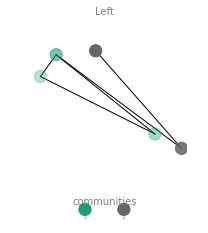

In [7]:
# Define the nodes (5 example nodes)
nodes_df = pd.DataFrame(data={'x': [40, 10, 30, -15, -25], 
                              'y': [50, 40, -10, -20, 20], 
                              'z': [20, 30, -10, -15, 30], 
                              'communities': [1, 1, 1, 2, 2], 
                              'degree_centrality': [1, 1, 0.2, 0.8, 0.4]})
# Define the edges 
edges_df = pd.DataFrame(data={'i': [0, 0, 1, 1, 3], 
                              'j': [1, 2, 2, 3, 4]})
# Call netplotbrain to plot
netplotbrain.plot(
    nodes=nodes_df,
    edges=edges_df,
    node_color='communities',
    arrowaxis=None,
    node_scale=150)

## Specifying Templates
### Template (nifti or string)

For the template you can supply any nifti file.

You can also provide the template name for any template on templateflow.org.
The T1w brain mask will then be automatically downloaded (if not already present on your computer) and used as the background.

Note, if there are multiple cohorts for the atlas, you should add which cohort it is to the string. This specification follows the format "templatename_cohort-X". So, for example, if you want to use the second cohort for MNIInfant, you specify "MNIInfant_cohort-2". Additionally, if there is a specific templateflow file that you wish to use (that is not one of the default template files) you can specify a dictionary of templateflow keyword-value pairs. 

### Template Styles

There are currently four background styles: "glass", "surface", "cloudy" and "filled".

The surface quickly renders a surface from the voxels. Additional arguments can be provided in order to modify the resolution of the surface.

The cloudy style tries to identify the outline of the mask and plots points along the edges.The cloudy style is quick, but the edge detection is run relative to the specified initial view of the plot.

The filled style plots the template's brain mask as voxels. This can be slightly RAM consuming.

For templates, you can change the voxelsize of the template. Larger voxels means the plot will be generated quicker.

This can come in handy especially when the filled style is used. 

When `template_voxelsize` is unchanged, the rendering can take time.   

                   Consider increasing the voxel size using the argument template_voxelsize.


(<Figure size 216x216 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

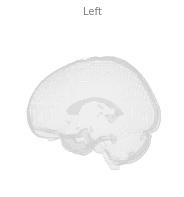

In [8]:
# Call netplotbrain to plot
netplotbrain.plot(
    template='MNI152NLin6Asym',
    template_style='filled',
    arrowaxis=None)   
# renders in ca 156 seconds 

In order to notably reduce the rendering speed, you can increase `template_voxelsize`. 


increasing voxelsize
netplotbrain.plot(
    template='MNI152NLin6Asym',
    template_style='filled',
    template_voxelsize=3,
    arrowaxis=None)
renders in ca 24 seconds 

However, note that an excessive increase of voxelsize can degrade spatial resolution.  

(<Figure size 216x216 with 1 Axes>, [<Axes3D: title={'center': 'Left'}>])

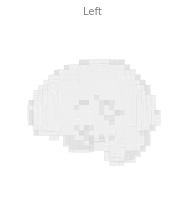

In [9]:
# further increasing voxelsize
netplotbrain.plot(
    template='MNI152NLin6Asym',
    template_style='filled',
    template_voxelsize=7,
    arrowaxis=None)
    
# renders in ca. 3 seconds 

Thus, when using the filled style, we invite you to consider the trade-off between rendering speed and spatial resolution.